In [1]:
# Nanjing Metro Final Project switch-or-not choice model
# Prof: Joan Walker, Spring 2018
# GSI: Mustapha Harb - Mengqiao Yu - Andrew Campbell

# import the required libraries
from collections import OrderedDict    # For recording the model specification 

import pandas as pd                    # For file input/output
import numpy as np                     # For vectorized math operations

import pylogit as pl                   # For MNL model estimation and
                                       # conversion from wide to long format

# reading the data file 
data_01 = pd.read_csv("../feature_engineering/prebuilt/for_pylogit.csv",sep=",")

In [2]:
#look at the columns and the data
data_01.columns

Index([u'Unnamed: 0', u'choice', u'choice_id', u'discounted', u'fare_3',
       u'fare_n', u'free_fare', u'full_fare', u'id', u'ttime_3', u'ttime_n'],
      dtype='object')

In [3]:
import numpy as np

# Adding availabilities and reformulating for pylogit
data_01['a1_AV']=np.ones(len(data_01))
data_01['a2_AV']=np.ones(len(data_01))
data_01['choice'] = data_01.choice +1
print(len(data_01))
data_01 = data_01.replace([np.inf, -np.inf], np.nan)
data_01 =data_01.dropna()

print(len(data_01))
data_01.head(20)
data_01

9846
9776


,Unnamed: 0,choice,choice_id,discounted,fare_3,fare_n,free_fare,full_fare,id,ttime_3,ttime_n,a1_AV,a2_AV
0,0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,9.962641e+11,4.843750,0.000000,1.0,1.0
3,3,1.0,4.0,0.0,0.000000,0.0,1.0,0.0,9.960610e+11,8.093750,3.250000,1.0,1.0
4,4,2.0,5.0,0.0,0.000000,0.0,1.0,0.0,9.971667e+11,2.687500,2.687500,1.0,1.0
5,5,1.0,6.0,0.0,190.000000,190.0,0.0,1.0,9.961712e+11,9.171875,9.906250,1.0,1.0
6,6,1.0,7.0,0.0,0.000000,0.0,1.0,0.0,9.931001e+11,3.609375,3.609375,1.0,1.0
7,7,1.0,8.0,0.0,316.461039,190.0,0.0,1.0,9.971680e+11,8.015625,4.812500,1.0,1.0
8,8,1.0,9.0,1.0,398.214286,100.0,0.0,0.0,9.961723e+11,24.390625,6.125000,1.0,1.0
9,9,1.0,10.0,0.0,0.000000,0.0,1.0,0.0,9.736747e+11,16.406250,8.421875,1.0,1.0
10,10,1.0,11.0,0.0,0.000000,0.0,1.0,0.0,9.971666e+11,16.906250,14.718750,1.0,1.0
11,11,1.0,12.0,1.0,100.000000,100.0,0.0,0.0,9.931723e+11,15.046875,13.046875,1.0,1.0


In [4]:
# Converting the data from wide format to long format
# Create the list of individual specific variables

ind_variables = data_01.columns.tolist()
ind_variables = ['full_fare','discounted','free_fare']
data_01.head(20)

,Unnamed: 0,choice,choice_id,discounted,fare_3,fare_n,free_fare,full_fare,id,ttime_3,ttime_n,a1_AV,a2_AV
0,0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,9.962641e+11,4.843750,0.000000,1.0,1.0
3,3,1.0,4.0,0.0,0.000000,0.0,1.0,0.0,9.960610e+11,8.093750,3.250000,1.0,1.0
4,4,2.0,5.0,0.0,0.000000,0.0,1.0,0.0,9.971667e+11,2.687500,2.687500,1.0,1.0
5,5,1.0,6.0,0.0,190.000000,190.0,0.0,1.0,9.961712e+11,9.171875,9.906250,1.0,1.0
6,6,1.0,7.0,0.0,0.000000,0.0,1.0,0.0,9.931001e+11,3.609375,3.609375,1.0,1.0
7,7,1.0,8.0,0.0,316.461039,190.0,0.0,1.0,9.971680e+11,8.015625,4.812500,1.0,1.0
8,8,1.0,9.0,1.0,398.214286,100.0,0.0,0.0,9.961723e+11,24.390625,6.125000,1.0,1.0
9,9,1.0,10.0,0.0,0.000000,0.0,1.0,0.0,9.736747e+11,16.406250,8.421875,1.0,1.0
10,10,1.0,11.0,0.0,0.000000,0.0,1.0,0.0,9.971666e+11,16.906250,14.718750,1.0,1.0
11,11,1.0,12.0,1.0,100.000000,100.0,0.0,0.0,9.931723e+11,15.046875,13.046875,1.0,1.0


In [5]:
# Specify the variables that vary across individuals and some or all alternatives
# The keys are the column names that will be used in the long format dataframe.
# The values are dictionaries whose key-value pairs are the alternative id and
# the column name of the corresponding column that encodes that variable for
# the given alternative.


alt_varying_variables ={u'fare': dict([(1, 'fare_n'),
                                                 (2, 'fare_3')]),
                          
                          u'travel_time': dict([(1, 'ttime_n'),
                                                (2, 'ttime_3')]),                         
                          
                          }

In [6]:
# Specify the availability variables
# Note that the keys of the dictionary are the alternative id's.
# The values are the columns denoting the availability for the
# given alternative in the dataset.
availability_variables = {1: 'a1_AV',
                          2: 'a2_AV'}

In [7]:
##########
# Determine the columns for: alternative ids, the observation ids and the choice
##########
# The 'custom_alt_id' is the name of a column to be created in the long-format data
# It will identify the alternative associated with each row.

custom_alt_id = "alternative_id"
# Create a custom id column that ignores the fact that this is a 
# panel/repeated-observations dataset. 
obs_id_column = "choice_id"


# Create a variable recording the choice column
choice_column = "choice"

In [8]:
# Perform the conversion to long-format
data_long = pl.convert_wide_to_long(data_01, 
                                    ind_variables, 
                                    alt_varying_variables, 
                                    availability_variables, 
                                    obs_id_column, 
                                    choice_column,
                                    new_alt_id_name=custom_alt_id
                                    )
# Look at the resulting long-format dataframe
data_long.head(10)

C:\Users\nacho\Anaconda2\lib\site-packages\pylogit\choice_tools.py:453: UserWarning: Note, there are 13 variables in wide_data but the inputs ind_vars, alt_specific_vars, and subset_specific_vars only account for 11 variables.
  msg_2 + msg_3.format(num_vars_accounted_for))


,choice_id,alternative_id,choice,full_fare,discounted,free_fare,fare,travel_time
0,1,1,1,0.0,0.0,1.0,0.0,0.000000
1,1,2,0,0.0,0.0,1.0,0.0,4.843750
2,4,1,1,0.0,0.0,1.0,0.0,3.250000
3,4,2,0,0.0,0.0,1.0,0.0,8.093750
4,5,1,0,0.0,0.0,1.0,0.0,2.687500
5,5,2,1,0.0,0.0,1.0,0.0,2.687500
6,6,1,1,1.0,0.0,0.0,190.0,9.906250
7,6,2,0,1.0,0.0,0.0,190.0,9.171875
8,7,1,1,0.0,0.0,1.0,0.0,3.609375
9,7,2,0,0.0,0.0,1.0,0.0,3.609375


In [9]:
# Create columns with specified variable * characteristic

data_long['FareXFull'] = data_long['fare']* data_long.full_fare
data_long['FareXDiscounted'] = data_long['fare']* data_long.discounted
data_long['TravelTimeXFull'] = data_long.travel_time* data_long.full_fare
data_long['TravelTimeXDiscounted'] = data_long.travel_time* data_long.discounted


##########
# Create scaled variables so the estimated coefficients are of similar magnitudes
##########
# Scale the travel time column by 60 to convert raw units (minutes) to hours

# specifying the utility equations

# NOTE: - Specification and variable names must be ordered dictionaries.
#       - Keys should be variables within the long format dataframe.
#         The sole exception to this is the "intercept" key.
#       - For the specification dictionary, the values should be lists
#         of integers or or lists of lists of integers. Within a list, 
#         or within the inner-most list, the integers should be the 
#         alternative ID's of the alternative whose utility specification 
#         the explanatory variable is entering. Lists of lists denote 
#         alternatives that will share a common coefficient for the variable
#         in question.


basic_specification = OrderedDict()
basic_names = OrderedDict()

#basic_specification["intercept"] = [[1, 2]]
#basic_names["intercept"] = ['ASC Alternative' ]
#                            'ASC Alternative 2']

#basic_specification["travel_time"] = [[1, 2]]
#basic_names["travel_time"] = ['Travel Time, units:mins (Staying)']

basic_specification["fare"] = [[1, 2]]
basic_names["fare"] = ['Fare, units:1/100ths Yuan']

#basic_specification["discounted"] = [[1, 2]]
#basic_names["discounted"] = ['discounted']

#basic_specification["full_fare"] = [[1, 2]]
#basic_names["full_fare"] = ['full_fare']

#basic_specification["TravelTimeXDiscounted"] = [[1, 2]]
#basic_names['TravelTimeXDiscounted'] = ['TravelTimeXDiscounted']

#basic_specification["TravelTimeXFull"] = [[1, 2]]
#basic_names['TravelTimeXFull'] = ['TravelTimeXFull']

#basic_specification["FareXFull"] = [[1, 2]]
#basic_names['FareXFull'] = ['FareXFull']

#basic_specification['FareXDiscounted'] = [[1, 2]]
#basic_names['FareXDiscounted'] = ['FareXDiscounted']
#basic_specification['TravelTimeXSenior'] = [[1, 2]]
#basic_names['TravelTimeXSenior'] = ['TravelTimeXSenior']
print(data_long.columns)

Index([            u'choice_id',        u'alternative_id',
                      u'choice',             u'full_fare',
                  u'discounted',             u'free_fare',
                        u'fare',           u'travel_time',
                   u'FareXFull',       u'FareXDiscounted',
             u'TravelTimeXFull', u'TravelTimeXDiscounted'],
      dtype='object')


In [10]:
basic_specification

OrderedDict([('fare', [[1, 2]])])

In [11]:
# Estimate the binary logit model (
naijing_logit = pl.create_choice_model(data=data_long,
                                        alt_id_col=custom_alt_id,
                                        obs_id_col=obs_id_column,
                                        choice_col=choice_column,
                                        specification=basic_specification,
                                        model_type="MNL",
                                        names=basic_names)

# Specify the initial values and method for the optimization.
naijing_logit.fit_mle(np.zeros(1)) # 4 being the total number of parameters to be estimated

print(naijing_logit.data.columns)

Log-likelihood at zero: -6,776.2068
Initial Log-likelihood: -6,776.2068


C:\Users\nacho\Anaconda2\lib\site-packages\scipy\optimize\_minimize.py:385: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.61 seconds.
Final log-likelihood: -6,459.2259
Index([            u'choice_id',        u'alternative_id',
                      u'choice',             u'full_fare',
                  u'discounted',             u'free_fare',
                        u'fare',           u'travel_time',
                   u'FareXFull',       u'FareXDiscounted',
             u'TravelTimeXFull', u'TravelTimeXDiscounted'],
      dtype='object')


In [12]:
# Look at the estimation results
naijing_logit.get_statsmodels_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                9,776
Model:             Multinomial Logit Model   Df Residuals:                    9,775
Method:                                MLE   Df Model:                            1
Date:                     Thu, 03 May 2018   Pseudo R-squ.:                   0.047
Time:                             12:22:18   Pseudo R-bar-squ.:               0.047
AIC:                            12,920.452   Log-Likelihood:             -6,459.226
BIC:                            12,927.640   LL-Null:                    -6,776.207
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Fare, units:1/100ths Yuan    -0.0039      0.000    -19.428      0.000      -0.004      -0.003
=============================================================================================
"""

In [13]:
# Log Likelihood
naijing_logit.log_likelihood

-6459.225926874542

In [17]:
# Looking at choice distribution of "discounted" group
import matplotlib.pyplot as plt
x= data_01.where(data_01["discounted"]==1).dropna(how='any')

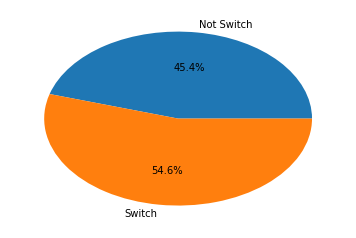

In [18]:
xprop=sum(x['choice']==1)
labels='Not Switch','Switch'
plt.pie([xprop,len(x)],labels=labels,autopct='%1.1f%%')
plt.savefig('discounted.png',dpi=600)
plt.show()

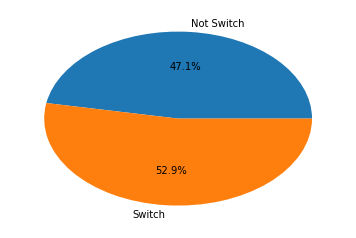

In [19]:
# Choice distribution of "full_fare" group
x= data_01.where(data_01["full_fare"]==1).dropna(how='any')
xprop=sum(x['choice']==1)
labels='Not Switch','Switch'
plt.pie([xprop,len(x)],labels=labels,autopct='%1.1f%%')
plt.show()